In [1]:
%matplotlib notebook
import sys
sys.path.insert(1, '../../src/')

In [353]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from collections import defaultdict
from scipy.stats.stats import pearsonr
from fim import apriori

In [346]:
df = pd.read_csv('data/training.csv') 

In [335]:
df[:10]

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,326,1,10/25/2010,ADESA,2008,2,KIA,SPECTRA,EX,4D SEDAN EX,...,9605.0,10650.0,NaN,NaN,5546,33619,FL,6100.0,0,533
1,42991,0,5/27/2009,MANHEIM,2006,3,DODGE,STRATUS V6 2.7L V6 M,SXT,4D SEDAN SXT FFV,...,6418.0,7478.0,NaN,NaN,99750,32124,FL,4000.0,0,1630
2,55273,0,3/18/2010,OTHER,2008,2,DODGE,CALIBER,SE,4D WAGON,...,10721.0,11350.0,NaN,NaN,99761,74135,OK,7500.0,0,693
3,29058,0,6/8/2009,OTHER,2005,4,FORD,FREESTAR FWD V6 3.9L,S,PASSENGER 3.9L,...,5702.0,7691.0,NaN,NaN,99761,85018,AZ,4725.0,0,1633
4,34991,0,3/4/2009,MANHEIM,2005,4,CHRYSLER,TOWN & COUNTRY FWD V,Bas,MINIVAN 3.3L,...,6300.0,7856.0,NaN,NaN,20833,75236,TX,5670.0,0,1623
5,62522,0,4/22/2009,ADESA,2007,2,KIA,SPECTRA 2.0L I4 EFI,EX,4D SEDAN EX,...,5087.0,6143.0,NaN,NaN,21053,85226,AZ,5430.0,0,462
6,1653,0,5/21/2010,ADESA,2005,5,NISSAN,ALTIMA,Bas,4D SEDAN,...,9518.0,11377.0,NaN,NaN,5546,34203,FL,7675.0,0,723
7,40878,0,9/24/2009,MANHEIM,2008,1,DODGE,AVENGER 4C 2.4L I4 S,SE,4D SEDAN,...,11871.0,12554.0,NaN,NaN,99740,29532,SC,7810.0,0,920
8,55149,0,7/6/2010,MANHEIM,2006,4,SUZUKI,FORENZA,NaN,4D SEDAN,...,6935.0,8216.0,NaN,NaN,20234,97217,OR,5870.0,0,462
9,7255,0,6/4/2009,MANHEIM,2006,3,SUZUKI,FORENZA 2.0L I4 EFI,NaN,4D SEDAN,...,4726.0,5756.0,NaN,NaN,18880,30272,GA,4825.0,0,505


In [377]:
X = df[['Make', 'Model']]
gkk = X.groupby(['Make', 'Model']) 
gkk.first()
#for key, item in gkk:
#    print(key)

Empty DataFrame
Columns: []
Index: [(ACURA, 3.2 CL 3.2L V 6 NA S), (ACURA, 3.2 TL), (ACURA, 3.2 TL 3.2L V6 EFI), (ACURA, 3.2 TL 3.2L V6 FI DO), (ACURA, MDX 4WD), (ACURA, MDX 4WD 3.5L V6 SOHC), (ACURA, RSX), (ACURA, TL), (ACURA, TSX), (BUICK, CENTURY V6), (BUICK, CENTURY V6 3.1L V6 S), (BUICK, LACROSSE), (BUICK, LACROSSE 3.6L V6 SFI), (BUICK, LACROSSE 3.8L V6 SFI), (BUICK, LE SABRE), (BUICK, LE SABRE 3.8L V6 MFI), (BUICK, LE SABRE 3.8L V6 MPI), (BUICK, LE SABRE Unspecified), (BUICK, LUCERNE V6), (BUICK, LUCERNE V6 3.8L V6 S), (BUICK, PARK AVENUE), (BUICK, PARK AVENUE 3.8L V6), (BUICK, RAINIER AWD V6), (BUICK, RAINIER AWD V6 4.2L), (BUICK, RAINIER AWD V8), (BUICK, RAINIER RWD V6), (BUICK, RAINIER RWD V6 4.2L), (BUICK, RAINIER RWD V8), (BUICK, RAINIER RWD V8 5.3L), (BUICK, REGAL), (BUICK, REGAL 3.8L V6 MFI), (BUICK, REGAL 3.8L V6 MFI SC), (BUICK, REGAL 3.8L V6 SFI), (BUICK, RENDEZVOUS FWD), (BUICK, TERRAZA FWD V6), (BUICK, TERRAZA FWD V6 3.5L), (CADILLAC, CTS), (CADILLAC, CTS 3.6L V6 SFI), (CADILLAC, SRX AWD V6), (CADILLAC, SRX AWD V6 3.6L V6 S), (CADILLAC, SRX AWD V8 4.6L V8 S), (CADILLAC, STS V6), (CHEVROLET, 1500 SILVERADO PICKU), (CHEVROLET, 1500HD SILVERADO PIC), (CHEVROLET, 2500 SILVERADO PICKU), (CHEVROLET, 2500HD SILVERADO PIC), (CHEVROLET, AVALANCHE 1500 2WD V), (CHEVROLET, AVALANCHE 1500 4WD V), (CHEVROLET, AVALANCHE 2500 2WD V), (CHEVROLET, AVEO), (CHEVROLET, AVEO 1.6L I-4 EFI DO), (CHEVROLET, AVEO 1.6L I-4 MPI DO), (CHEVROLET, AVEO 1.6L I4 DOHC), (CHEVROLET, AVEO 1.6L I4 EFI), (CHEVROLET, AVEO 1.6L I4 EFI / M), (CHEVROLET, CAMARO V6 3.8L V6 MF), (CHEVROLET, CAVALIER 4C), (CHEVROLET, CAVALIER 4C 2.2L I 4), (CHEVROLET, CAVALIER 4C 2.2L I-4), (CHEVROLET, CAVALIER 4C 2.2L I4), (CHEVROLET, CAVALIER 4C 2.4L I-4), (CHEVROLET, COBALT), (CHEVROLET, COBALT 2.2L I-4 MPI), (CHEVROLET, COBALT 2.2L I4 MPI), (CHEVROLET, COBALT 2.2L I4 MPI /), (CHEVROLET, COLORADO PICKUP 2WD), (CHEVROLET, COLORADO PICKUP 4WD), (CHEVROLET, EQUINOX AWD V6), (CHEVROLET, EQUINOX AWD V6 3.4L), (CHEVROLET, EQUINOX FWD V6), (CHEVROLET, EQUINOX FWD V6 3.4L), (CHEVROLET, HHR), (CHEVROLET, HHR 2.2L I-4 MPI DOH), (CHEVROLET, HHR 2.2L I4 MPI), (CHEVROLET, HHR 2.2L I4 MPI / SF), (CHEVROLET, HHR 2.4L I-4 MPI), (CHEVROLET, HHR 2.4L I4 MPI), (CHEVROLET, HHR 2.4L I4 MPI / SF), (CHEVROLET, IMPALA), (CHEVROLET, IMPALA 3.4L V6 SFI), (CHEVROLET, IMPALA 3.5L V6 MPI /), (CHEVROLET, IMPALA 3.5L V6 SFI), (CHEVROLET, IMPALA 3.5L V6 SFI F), (CHEVROLET, IMPALA 3.8L V6 MFI), (CHEVROLET, IMPALA 3.8L V6 MFI S), (CHEVROLET, IMPALA 3.8L V6 SFI), (CHEVROLET, IMPALA 3.9L V6 SFI), (CHEVROLET, IMPALA 5.3L V8 SFI), (CHEVROLET, IMPALA V6), (CHEVROLET, IMPALA V6 3.5L V6 MP), (CHEVROLET, IMPALA V6 3.5L V6 SF), (CHEVROLET, IMPALA V6 3.9L V6 SF), (CHEVROLET, MALIBU 4C), (CHEVROLET, MALIBU 4C 2.2L I-4 M), (CHEVROLET, MALIBU 4C 2.2L I4 MF), (CHEVROLET, MALIBU 4C 2.2L I4 MP), (CHEVROLET, MALIBU 4C 2.4L I4 MP), (CHEVROLET, MALIBU MAXX V6), (CHEVROLET, MALIBU MAXX V6 3.5L), (CHEVROLET, MALIBU V6), ...]

[931 rows x 0 columns]

In [327]:
df["Model"].value_counts()

PT CRUISER              1845
IMPALA                  1616
TAURUS                  1154
CALIBER                 1108
CARAVAN GRAND FWD V6    1021
MALIBU 4C                991
SEBRING 4C               941
TAURUS 3.0L V6 EFI       917
PT CRUISER 2.4L I4 S     909
COBALT                   900
1500 RAM PICKUP 2WD      880
IMPALA V6                857
STRATUS V6 2.7L V6 M     792
GRAND PRIX               725
FOCUS                    720
GRAND PRIX 3.8L V6 S     698
IMPALA 3.5L V6 SFI       669
MALIBU 4C 2.2L I4 MP     563
ALTIMA                   559
AVENGER 4C               551
ION                      550
SPECTRA                  544
FORENZA                  519
1500 SILVERADO PICKU     490
MALIBU V6                457
HHR                      447
G6 V6                    443
STRATUS V6               430
UPLANDER FWD V6          423
IMPALA 3.4L V6 SFI       413
                        ... 
SPORTAGE 2WD 4C MFI        1
HIGHLANDER 4WD V6 3.       1
GRAND AM 4C 2.2L I-4       1
RENO 2.0L I-4 

# Data Cleaning

We can't use here our cleaning function because it also works with missing values, but the main task of pattern mining is to find rules to substitute missing values. So here we do all the data cleaning EXCEPT dealing with missing values

<b>Typo correction</b>

In [347]:
df.iat[6895, 11]    =   'MANUAL'
df.iat[42627, 6]    =   'SCION'

#a = df[(df['Nationality']=='TOP LINE ASIAN') | (df['Nationality']=='OTHER ASIAN')].index
#for x in a:
#    df['Nationality'].values[x] = 'ASIAN'

# WheelTypeID 0.0 correction
df.iat[3897, 12]    =   1.0
df.iat[23432, 12]   =   1.0
df.iat[23831, 12]   =   2.0
df.iat[45666, 12]   =   1.0

# submodel la mode sui group by 
# Praticamente è la mode sui group by (più o meno specifici)

df.iat[28961, 9] = '4D SEDAN SE1'
df.iat[35224, 9] = '4D SEDAN SXT FFV'
df.iat[48641, 9] = '4D SEDAN SXT FFV'
df.iat[28280, 9] = 'PASSENGER 3.9L SE'
df.iat[33225, 9] = '4D SUV 4.6L'
df.iat[50661, 9] = 'REG CAB 2.2L FFV'
df.iat[23019, 9] = '4D SEDAN'

# size la mode sui group by
df.iat[18532, 16] = 'MEDIUM SUV'
df.iat[20016, 16] = 'SMALL SUV'
df.iat[35157, 16] = 'SMALL SUV'
df.iat[15769, 16] = 'MEDIUM SUV'

<b>Dropped features</b>

In [348]:
del df['PRIMEUNIT']
del df['AUCGUART']
del df['RefId']
del df['VNZIP1']
del df['Auction']
del df['IsOnlineSale']
del df['SubModel']
del df['Color']
del df['VehYear']
del df['PurchDate']
del df['Trim']
del df['TopThreeAmericanName']
del df['WheelType']
del df['BYRNO']
del df['MMRAcquisitionAuctionCleanPrice']
del df['MMRAcquisitionRetailAveragePrice']
del df['MMRAcquisitonRetailCleanPrice']
del df['MMRCurrentAuctionAveragePrice']
del df['MMRCurrentAuctionCleanPrice']
del df['MMRCurrentRetailAveragePrice']
del df['MMRCurrentRetailCleanPrice']

<b>Row deletion outliers</b>

In [349]:
features = ['VehOdo',
            'MMRAcquisitionAuctionAveragePrice',
            'VehBCost',
            'WarrantyCost',
            'VehicleAge']
for feature in features:
    for isBadBuy in [0,1]:
        q1 = df[(df.IsBadBuy == isBadBuy)][feature].quantile(0.25)
        q3 = df[(df.IsBadBuy == isBadBuy)][feature].quantile(0.75)
        iqr = q3 - q1
        qlow = q1 - 1.5*iqr
        qhigh = q3 + 1.5*iqr

        df.drop(df[(df.IsBadBuy == isBadBuy) & (df[feature] <= qlow)].index, inplace=True)
        df.drop(df[(df.IsBadBuy == isBadBuy) & (df[feature] >= qhigh)].index, inplace=True)

# Data Preparation

We have 5 numerical variables: VehicleAge, VehOdo, MMRAcquisitionAuctionAveragePrice, VehBCost and WarrantyCost.
The VehicleAge is almost categorical variable (it has only 8 possible values: from 1 to 8), but all the others have thousands of possible unique values. For Pattern Mining it will means that all these values will create different patterns which is not really useful for us. So we have decided to cluster these 4 variables: VehOdo, MMRAcquisitionAuctionAveragePrice, VehBCost and WarrantyCost - and substitute these variables with their class.

As the method of the clustering we choose hierarchical one. We are not sure if it is true in general but we saw that for VehBCost hierarchical clustering gives us clusters that have almost equal range between minimal value of the cost and the maximum one, the size of the clusters was not the same, but the range, as we said, was plus minus the same. On the other hand, k-means gave us clusters of the same size but the range was very different.
We thought that in real life when we want to buy a new car, the groups don't have the same number of options (there is a lot of cars in medium range and only few super expensive ones), but we start our search from the amount of money that we have, so the key factor is the range, not the size of the cluster.

Also in other papers we saw that they just write: we chose 7 cluster (or 4 clusters, the number here is not important). Nothing else. We at least watched the possible cluster and found some explanation why we chose this one and not another one. We don't want to reopen here from the begining all the discussion about clustering. So lets just assume we use hierarchical clustering.

In [350]:
df[:10]

,IsBadBuy,VehicleAge,Make,Model,Transmission,WheelTypeID,VehOdo,Nationality,Size,MMRAcquisitionAuctionAveragePrice,VNST,VehBCost,WarrantyCost
0,1,2,KIA,SPECTRA,AUTO,2.0,61184,OTHER ASIAN,MEDIUM,6796.0,FL,6100.0,533
1,0,3,DODGE,STRATUS V6 2.7L V6 M,AUTO,2.0,92383,AMERICAN,MEDIUM,5480.0,FL,4000.0,1630
2,0,2,DODGE,CALIBER,AUTO,2.0,45965,AMERICAN,MEDIUM,8067.0,OK,7500.0,693
3,0,4,FORD,FREESTAR FWD V6 3.9L,AUTO,2.0,80169,AMERICAN,VAN,4817.0,AZ,4725.0,1633
4,0,4,CHRYSLER,TOWN & COUNTRY FWD V,AUTO,1.0,77372,AMERICAN,VAN,5430.0,TX,5670.0,1623
6,0,5,NISSAN,ALTIMA,AUTO,2.0,81478,TOP LINE ASIAN,MEDIUM,6362.0,FL,7675.0,723
7,0,1,DODGE,AVENGER 4C 2.4L I4 S,AUTO,2.0,56717,AMERICAN,MEDIUM,8495.0,SC,7810.0,920
8,0,4,SUZUKI,FORENZA,AUTO,2.0,34616,OTHER ASIAN,MEDIUM,3939.0,OR,5870.0,462
9,0,3,SUZUKI,FORENZA 2.0L I4 EFI,MANUAL,2.0,57337,OTHER ASIAN,MEDIUM,3913.0,GA,4825.0,505
10,0,5,CHRYSLER,PT CRUISER 2.4L I4 S,AUTO,2.0,85093,AMERICAN,MEDIUM,3936.0,TN,5125.0,1503


<b>VehBCost clustering</b>

What we did here: took VehBCost, made hierarchical clustering for this variable, chose the threshold and then substituted the VehBCost column with VehBCost-Class which has 5 different classes: all of them have names [min; max] - [1720.0; 3815.0], [3820.0; 5745.0], [5750.0; 7450.0], [7455.0; 9815.0], [9820.0; 11645.0]

In [97]:
X = df[["VehBCost"]]

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [98]:
data_dist = pdist(X, metric='euclidean')

In [99]:
data_link = linkage(data_dist, method='complete', metric='euclidean')

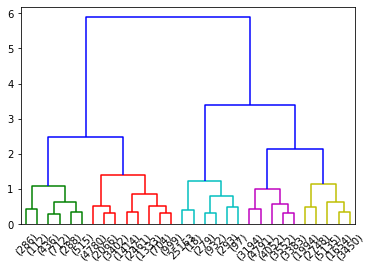

In [100]:
res = dendrogram(data_link, color_threshold=2, truncate_mode='lastp')

In [118]:
color_threshold = 2
num_clusters = 5
clusters = fcluster(data_link, color_threshold, criterion='distance')
df['VehBCost-Class'] = clusters
mapClassName = {}
for i in range(1, num_clusters+1):
    classVehBCost = df[df['VehBCost-Class'] == i]['VehBCost']
    mapClassName[i] = "[" + str(classVehBCost.min()) + "; " + str(classVehBCost.max()) + "]"
df['VehBCost-Class'] = df['VehBCost-Class'].map(mapClassName).astype(str)
del df['VehBCost']

In [135]:
df['VehBCost-Class'].value_counts()

[5750.0; 7450.0]     18972
[7455.0; 9815.0]     17159
[3820.0; 5745.0]     14981
[9820.0; 11645.0]     2349
[1720.0; 3815.0]      1620
Name: VehBCost-Class, dtype: int64

<b>VehOdo clustering</b>

What we did here: took VehOdo, made hierarchical clustering for this variable, chose the threshold and then substituted the VehOdo column with VehOdo-Class which has 5 different classes: all of them have names [min; max] - [30212; 45443], [45449; 61627], [61630; 71437], [71439; 91679], [91683; 112029]

In [120]:
X = df[["VehOdo"]]

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [121]:
data_dist = pdist(X, metric='euclidean')

In [122]:
data_link = linkage(data_dist, method='complete', metric='euclidean')

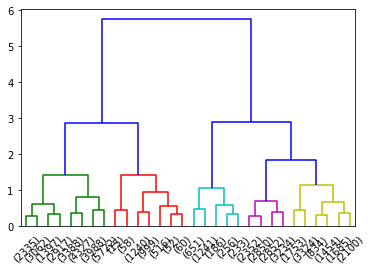

In [129]:
res = dendrogram(data_link, color_threshold=1.8, truncate_mode='lastp')

In [133]:
color_threshold = 1.8
num_clusters = 5
clusters = fcluster(data_link, color_threshold, criterion='distance')
df['VehOdo-Class'] = clusters
mapClassName = {}
for i in range(1, num_clusters+1):
    classVehBCost = df[df['VehOdo-Class'] == i]['VehOdo']
    mapClassName[i] = "[" + str(classVehBCost.min()) + "; " + str(classVehBCost.max()) + "]"
df['VehOdo-Class'] = df['VehOdo-Class'].map(mapClassName).astype(str)
del df['VehOdo']

In [134]:
df['VehOdo-Class'].value_counts()

[71439; 91679]     27136
[61630; 71437]     11288
[45449; 61627]     11150
[91683; 112029]     2940
[30212; 45443]      2567
Name: VehOdo-Class, dtype: int64

<b>MMRAcquisitionAuctionAveragePrice</b>

What we did here: took MMRAcquisitionAuctionAveragePrice, made hierarchical clustering for this variable, chose the threshold and then substituted the MMRAcquisitionAuctionAveragePrice column with MMRAcquisitionAuctionAveragePrice-Class which has 4 different classes: all of them have names [min; max] - [884.0; 3619.0], [3620.0; 6609.0], [6610.0; 10416.0], [10417.0; 12951.0].
Here we also have missing values, so there is one more group: group NaN. We should also not forget that here we have values 0.0 that are not real values! They are missing values, so as the first step we change 0.0 to NaN.

In [228]:
# 0 as acquisition price is still Missing value so here we just make controll
df.loc[df["MMRAcquisitionAuctionAveragePrice"] == 0] = np.nan
X = df[df['MMRAcquisitionAuctionAveragePrice'].notnull()][['MMRAcquisitionAuctionAveragePrice']]

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [229]:
data_dist = pdist(X, metric='euclidean')

In [230]:
data_link = linkage(data_dist, method='complete', metric='euclidean')

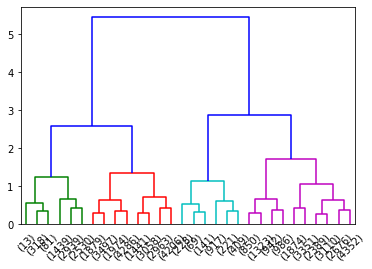

In [231]:
res = dendrogram(data_link, color_threshold=1.8, truncate_mode='lastp')

In [235]:
color_threshold = 1.8
num_clusters = 4
clusters = fcluster(data_link, color_threshold, criterion='distance')
df["MMRAcquisitionAuctionAveragePrice-Class"] = np.nan
df.loc[df["MMRAcquisitionAuctionAveragePrice"].notnull(), "MMRAcquisitionAuctionAveragePrice-Class"] = clusters
mapClassName = {}
for i in range(1, num_clusters+1):
    classVehBCost = df[df['MMRAcquisitionAuctionAveragePrice-Class'] == i]['MMRAcquisitionAuctionAveragePrice']
    mapClassName[i] = "[" + str(classVehBCost.min()) + "; " + str(classVehBCost.max()) + "]"
df['MMRAcquisitionAuctionAveragePrice-Class'] = df['MMRAcquisitionAuctionAveragePrice-Class'].map(mapClassName).astype(str)
del df['MMRAcquisitionAuctionAveragePrice']

In [236]:
df['MMRAcquisitionAuctionAveragePrice-Class'].value_counts()

[3620.0; 6609.0]      23304
[6610.0; 10416.0]     21853
[884.0; 3619.0]        7320
[10417.0; 12951.0]     1985
nan                     619
Name: MMRAcquisitionAuctionAveragePrice-Class, dtype: int64

<b>WarrantyCost</b>

What we did here: took WarrantyCost, made hierarchical clustering for this variable, chose the threshold and then substituted the WarrantyCost column with WarrantyCost-Class which has 5 different classes: all of them have names [min; max] - [462.0; 728.0], [754.0; 1223.0], [1241.0; 1808.0], [1857.0; 2282.0], [2322.0; 2838.0]. Here we also have missing values, so there is one more group: group NaN.

In [246]:
X = df[df['WarrantyCost'].notnull()][['WarrantyCost']]

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [247]:
data_dist = pdist(X, metric='euclidean')

In [248]:
data_link = linkage(data_dist, method='complete', metric='euclidean')

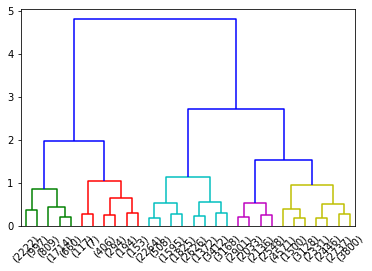

In [250]:
res = dendrogram(data_link, color_threshold=1.2, truncate_mode='lastp')

In [254]:
color_threshold = 1.2
num_clusters = 5
clusters = fcluster(data_link, color_threshold, criterion='distance')
df["WarrantyCost-Class"] = np.nan
df.loc[df["WarrantyCost"].notnull(), "WarrantyCost-Class"] = clusters
mapClassName = {}
for i in range(1, num_clusters+1):
    classVehBCost = df[df['WarrantyCost-Class'] == i]['WarrantyCost']
    mapClassName[i] = "[" + str(classVehBCost.min()) + "; " + str(classVehBCost.max()) + "]"
df['WarrantyCost-Class'] = df['WarrantyCost-Class'].map(mapClassName).astype(str)
del df['WarrantyCost']

In [252]:
df['WarrantyCost-Class'].value_counts()

[754.0; 1223.0]     20513
[1241.0; 1808.0]    16770
[462.0; 728.0]       9618
[1857.0; 2282.0]     6402
[2322.0; 2838.0]     1171
nan                   607
Name: WarrantyCost-Class, dtype: int64

So after all the transformations we should get something like this:

In [352]:
df[:10]

,IsBadBuy,VehicleAge,Make,Model,Transmission,WheelTypeID,Nationality,Size,VNST,VehBCost-Class,VehOdo-Class,MMRAcquisitionAuctionAveragePrice-Class,WarrantyCost-Class
0,1,2,KIA,SPECTRA,AUTO,2.0,OTHER ASIAN,MEDIUM,FL,[5750; 7450],[45449; 61627],[6610; 10416],[462; 728]
1,0,3,DODGE,STRATUS V6 2.7L V6 M,AUTO,2.0,AMERICAN,MEDIUM,FL,[3820; 5745],[91683; 112029],[3620; 6609],[1241; 1808]
2,0,2,DODGE,CALIBER,AUTO,2.0,AMERICAN,MEDIUM,OK,[7455; 9815],[45449; 61627],[6610; 10416],[462; 728]
3,0,4,FORD,FREESTAR FWD V6 3.9L,AUTO,2.0,AMERICAN,VAN,AZ,[3820; 5745],[71439; 91679],[3620; 6609],[1241; 1808]
4,0,4,CHRYSLER,TOWN & COUNTRY FWD V,AUTO,1.0,AMERICAN,VAN,TX,[3820; 5745],[71439; 91679],[3620; 6609],[1241; 1808]
6,0,5,NISSAN,ALTIMA,AUTO,2.0,TOP LINE ASIAN,MEDIUM,FL,[7455; 9815],[71439; 91679],[3620; 6609],[462; 728]
7,0,1,DODGE,AVENGER 4C 2.4L I4 S,AUTO,2.0,AMERICAN,MEDIUM,SC,[7455; 9815],[45449; 61627],[6610; 10416],[754; 1223]
8,0,4,SUZUKI,FORENZA,AUTO,2.0,OTHER ASIAN,MEDIUM,OR,[5750; 7450],[30212; 45443],[3620; 6609],[462; 728]
9,0,3,SUZUKI,FORENZA 2.0L I4 EFI,MANUAL,2.0,OTHER ASIAN,MEDIUM,GA,[3820; 5745],[45449; 61627],[3620; 6609],[462; 728]
10,0,5,CHRYSLER,PT CRUISER 2.4L I4 S,AUTO,2.0,AMERICAN,MEDIUM,TN,[3820; 5745],[71439; 91679],[3620; 6609],[1241; 1808]


But to get this result I did hierarchical clustering 4 times, which is really time consuming, so I created the shortcut of division into clusters, so from now we didn't have to wait for so long to have our division for numerical values

In [351]:
# VehBCost
df["VehBCost-Class"] = np.nan
criteria = [df['VehBCost'].between(1720, 3815), df['VehBCost'].between(3820, 5745), df['VehBCost'].between(5750, 7450), df['VehBCost'].between(7455, 9815), df['VehBCost'].between(9820, 11645)]
values = ["[1720; 3815]", "[3820; 5745]", "[5750; 7450]", "[7455; 9815]", "[9820; 11645]"]
df['VehBCost-Class'] = np.select(criteria, values, 0)
del df["VehBCost"]

# VehOdo
df["VehOdo-Class"] = np.nan
criteria = [df['VehOdo'].between(30212, 45443), df['VehOdo'].between(45449, 61627), df['VehOdo'].between(61630, 71437), df['VehOdo'].between(71439, 91679), df['VehOdo'].between(91683, 112029)]
values = ["[30212; 45443]", "[45449; 61627]", "[61630; 71437]", "[71439; 91679]", "[91683; 112029]"]
df['VehOdo-Class'] = np.select(criteria, values, 0)
del df["VehOdo"]

# MMRAcquisitionAuctionAveragePrice
df.loc[df["MMRAcquisitionAuctionAveragePrice"] == 0, "MMRAcquisitionAuctionAveragePrice"] = np.nan
df["MMRAcquisitionAuctionAveragePrice-Class"] = np.nan
criteria = [df['MMRAcquisitionAuctionAveragePrice'].between(884, 3619), df['MMRAcquisitionAuctionAveragePrice'].between(3620, 6609), df['MMRAcquisitionAuctionAveragePrice'].between(6610, 10416), df['MMRAcquisitionAuctionAveragePrice'].between(10417, 12951)]
values = ["[884; 3619]", "[3620; 6609]", "[6610; 10416]", "[10417; 12951]"]
df['MMRAcquisitionAuctionAveragePrice-Class'] = np.select(criteria, values, np.nan)
del df["MMRAcquisitionAuctionAveragePrice"]

# MMRAcquisitionAuctionAveragePrice
df["WarrantyCost-Class"] = np.nan
criteria = [df['WarrantyCost'].between(462, 728), df['WarrantyCost'].between(754, 1223), df['WarrantyCost'].between(1241, 1808), df['WarrantyCost'].between(1857, 2282), df['WarrantyCost'].between(2322, 2838)]
values = ["[462; 728]", "[754; 1223]", "[1241; 1808]", "[1857; 2282]", "[2322; 2838]"]
df['WarrantyCost-Class'] = np.select(criteria, values, np.nan)
del df["WarrantyCost"]

# Apriori algorythm

In [356]:
help(apriori)

Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

In [354]:
baskets = df.values.tolist()

In [355]:
baskets[0]

[1,
 2,
 'KIA',
 'SPECTRA',
 'AUTO',
 2.0,
 'OTHER ASIAN',
 'MEDIUM',
 'FL',
 '[5750; 7450]',
 '[45449; 61627]',
 '[6610; 10416]',
 '[462; 728]']

In [383]:
itemsets = apriori(baskets, supp=80, zmin=1, target='a') 
print('Number of itemsets:', len(itemsets))
itemsets

Number of itemsets: 5


[(('AMERICAN',), 46060),
 (('AMERICAN', 'AUTO'), 44854),
 ((0,), 48388),
 ((0, 'AUTO'), 46690),
 (('AUTO',), 53157)]

In [382]:
itemsets = apriori(baskets, supp=80, zmin=1, target='a') 
print('Number of itemsets:', len(itemsets))
itemsets

[(('AMERICAN',), 46060),
 (('AMERICAN', 'AUTO'), 44854),
 ((0,), 48388),
 ((0, 'AUTO'), 46690),
 (('AUTO',), 53157)]

In [358]:
rules = apriori(baskets, supp=10, zmin=2, target='r', conf=60, report='ascl') 
print('Number of rule:', len(rules))

Number of rule: 1704


In [363]:
for r in rules:
    if r[0] == 1:
        print(r)

(1, ('MEDIUM SUV', 'AUTO'), 5238, 0.09509631270310996, 0.8953846153846153, 1.5243456759596958)
(1, ('MEDIUM SUV',), 5341, 0.09696628601514133, 0.8943402545210984, 1.522567705979991)
(1, (6, 'AUTO'), 4400, 0.07988235507706831, 0.7525226611937745, 1.281130639216613)
(1, (6,), 4603, 0.08356783645903305, 0.7468765211747526, 1.2715183798858425)
(1, ('[884; 3619]', 'AMERICAN', 'AUTO'), 3689, 0.06697409269984204, 0.6249364729798408, 1.0639217984855847)
(1, ('[884; 3619]', 'AMERICAN'), 3875, 0.07035093770991813, 0.620695178600032, 1.056701215691054)
(1, ('[884; 3619]', 'AUTO'), 4112, 0.07465369183566022, 0.6004672897196262, 1.0222642883429167)
(1, ('FORD', 'AMERICAN', 0, 'AUTO'), 4927, 0.08945008260561718, 0.730358731099911, 1.2433977025318106)
(1, ('FORD', 'AMERICAN', 0), 5143, 0.09337158003667326, 0.7253878702397744, 1.2349350708004267)
(1, ('FORD', 'AMERICAN', 'AUTO'), 6203, 0.11261596557796699, 0.7732485664422837, 1.316415413494697)
(1, ('FORD', 'AMERICAN'), 6462, 0.11731813147909442, 0.76